In [52]:
import os
import requests
import pandas as pd
import numpy as np 
import panel as pn
pn.extension('plotly')
import plotly.express as px
import matplotlib.pyplot as plt

import seaborn as sns
import json

%matplotlib inline

In [53]:
my_cwn = 100 
my_dmp = 100
my_hvn = 100
my_pmv = 100

In [54]:
# import yfinance data
import yfinance as yf

In [55]:
data_df = yf.download(tickers = ['CWN.AX', 'DMP.AX', 'HVN.AX', 'PMV.AX'],period = "7d", interval = "1h")

[*********************100%***********************]  4 of 4 completed


In [56]:
data_df = data_df[["Close","Volume"]]
data_df
dataclose_df = data_df["Close"].copy()
dataclose_df


,CWN.AX,DMP.AX,HVN.AX,PMV.AX
2022-03-30 10:00:00+11:00,12.740,84.320000,5.700,28.809999
2022-03-30 11:00:00+11:00,12.750,85.779999,5.710,28.219999
2022-03-30 12:00:00+11:00,12.750,86.400002,5.700,28.200001
2022-03-30 13:00:00+11:00,12.750,86.309998,5.680,28.125000
2022-03-30 14:00:00+11:00,12.730,87.209999,5.710,28.379999
2022-03-30 15:00:00+11:00,12.760,87.669998,5.710,28.709999
2022-03-30 16:00:00+11:00,12.740,87.690002,5.710,28.680000
2022-03-31 10:00:00+11:00,12.780,88.190002,5.420,28.230000
2022-03-31 11:00:00+11:00,12.770,89.305000,5.410,28.280001
2022-03-31 12:00:00+11:00,12.770,89.309998,5.395,28.080000


In [57]:
datavol_df = data_df["Volume"].copy()
datavol_df

,CWN.AX,DMP.AX,HVN.AX,PMV.AX
2022-03-30 10:00:00+11:00,0.0,0.0,0,0.0
2022-03-30 11:00:00+11:00,2844042.0,30096.0,404395,25272.0
2022-03-30 12:00:00+11:00,1621495.0,29301.0,462692,38512.0
2022-03-30 13:00:00+11:00,1201602.0,19215.0,459277,32872.0
2022-03-30 14:00:00+11:00,682687.0,42433.0,458439,28097.0
2022-03-30 15:00:00+11:00,1958618.0,56370.0,485225,57634.0
2022-03-30 16:00:00+11:00,1689474.0,54805.0,0,72520.0
2022-03-31 10:00:00+11:00,0.0,0.0,1109881,0.0
2022-03-31 11:00:00+11:00,140007.0,46135.0,552766,21192.0
2022-03-31 12:00:00+11:00,1592936.0,35381.0,433444,16893.0


In [58]:
def read_data(data, start, end):
    data_df = yf.download(data, start, end)
    period = "7d"
    interval = "1h"
    data_df.dropna(inplace = True)
    dataclose_df = data_df["Close"]
    return dataclose_df


In [59]:
#tickers = ["CWN", "DMP", "HVN", "PMV"]

In [60]:
#aussharedata = read_data(['CWN.AX', 'DMP.AX', 'HVN.AX', 'PMV.AX'], "2022-03-25","2022-04-01")

In [61]:
# Helper create_bar_chart function
def create_bar_chart(data, title, xlabel, ylabel, color):
    """
    Create a barplot based in the data argument.
    """
    fig = plt.figure()
    bar_chart = data.plot.bar(color=color)
    bar_chart.set_xlabel(xlabel)
    bar_chart.set_ylabel(ylabel)
    bar_chart.set_title(title)
    plt.show()
    plt.close(fig)

In [62]:
def create_line_chart(data, title, xlabel, ylabel, color):
    """
    Create a line chart based in the data argument.
    """
    fig = plt.figure()
    line_chart = data.plot(color=color)
    line_chart.set_xlabel(xlabel)
    line_chart.set_ylabel(ylabel)
    line_chart.set_title(title)
    plt.show()
    plt.close(fig)

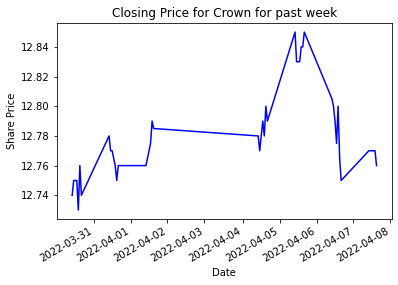

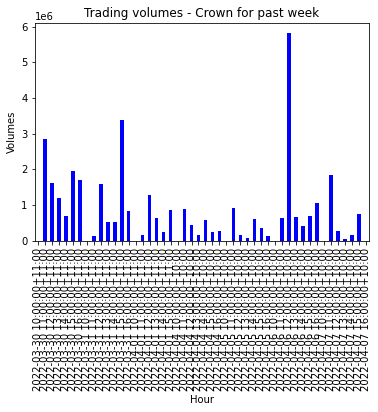

In [63]:
# Line  chart for closing prices 
create_line_chart(dataclose_df["CWN.AX"],"Closing Price for Crown for past week","Date","Share Price","blue")
# bar chart for volumes 
create_bar_chart(datavol_df["CWN.AX"],"Trading volumes - Crown for past week","Hour","Volumes","blue")




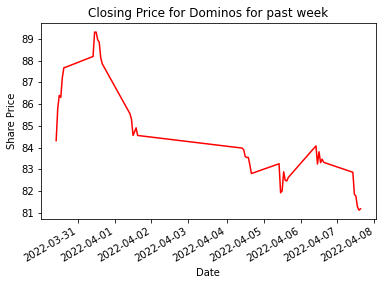

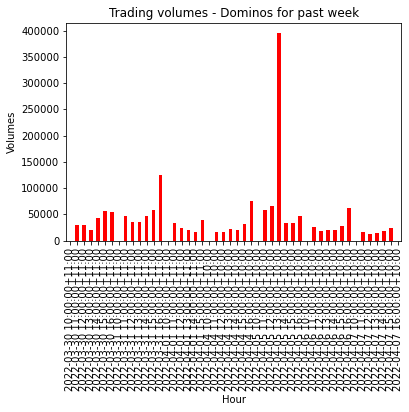

In [64]:
# Line chart for closing prices 
create_line_chart(dataclose_df["DMP.AX"],"Closing Price for Dominos for past week","Date","Share Price","red")
create_bar_chart(datavol_df["DMP.AX"],"Trading volumes - Dominos for past week","Hour","Volumes","red")

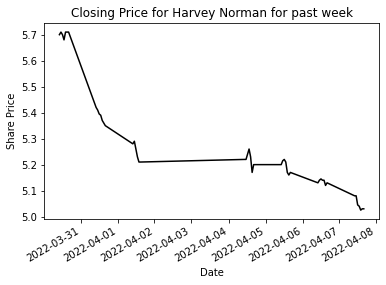

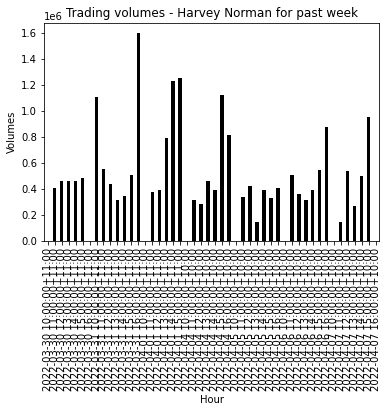

In [65]:
create_line_chart(dataclose_df["HVN.AX"],"Closing Price for Harvey Norman for past week","Date","Share Price","black")
create_bar_chart(datavol_df["HVN.AX"],"Trading volumes - Harvey Norman for past week","Hour","Volumes","black")

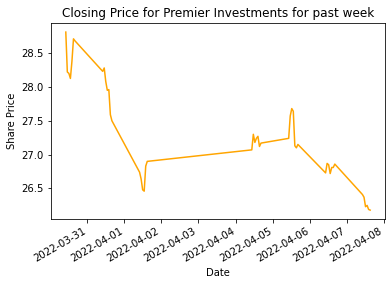

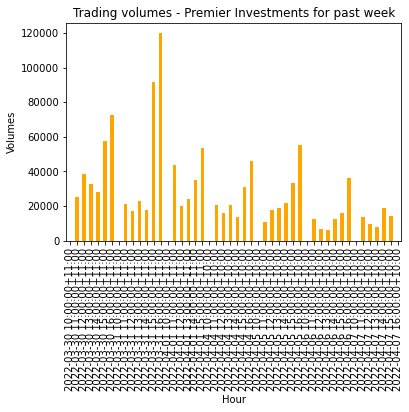

In [66]:
create_line_chart(dataclose_df["PMV.AX"],"Closing Price for Premier Investments for past week","Date","Share Price","orange")
create_bar_chart(datavol_df["PMV.AX"],"Trading volumes - Premier Investments for past week","Hour","Volumes","orange")

In [84]:
#aussharedata = yf.download('CWN.AX DMP.AX HVN.AX PMV.AX', start="2022-03-25", end="2022-04-01")
dataclose_df = dataclose_df.dropna()
dataclose_df.head(6)


,CWN.AX,DMP.AX,HVN.AX,PMV.AX
2022-03-30 10:00:00+11:00,12.74,84.320000,5.70,28.809999
2022-03-30 11:00:00+11:00,12.75,85.779999,5.71,28.219999
2022-03-30 12:00:00+11:00,12.75,86.400002,5.70,28.200001
2022-03-30 13:00:00+11:00,12.75,86.309998,5.68,28.125000
2022-03-30 14:00:00+11:00,12.73,87.209999,5.71,28.379999
2022-03-30 15:00:00+11:00,12.76,87.669998,5.71,28.709999


In [87]:
dataclosestd_df = dataclose_df.std()
dataclosestd_df.head()

CWN.AX    0.029698
DMP.AX    2.352980
HVN.AX    0.203354
PMV.AX    0.725798
dtype: float64

In [88]:
dataclosestd_df = dataclosestd_df.sort_values(ascending=False)
dataclosestd_df.head()

DMP.AX    2.352980
PMV.AX    0.725798
HVN.AX    0.203354
CWN.AX    0.029698
dtype: float64

In [78]:
correlation = dataclose_df.corr()
correlation

,CWN.AX,DMP.AX,HVN.AX,PMV.AX
CWN.AX,1.000000,-0.487206,-0.497914,-0.238949
DMP.AX,-0.487206,1.000000,0.707289,0.693198
HVN.AX,-0.497914,0.707289,1.000000,0.885824
PMV.AX,-0.238949,0.693198,0.885824,1.000000


<AxesSubplot:>

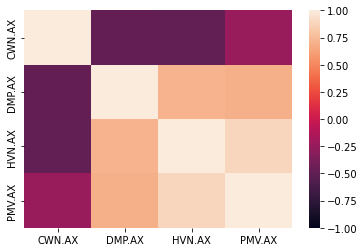

In [70]:
sns.heatmap(correlation, vmin=-1, vmax=1)

In [71]:
datareturns_df = dataclose_df.pct_change().copy()
datareturns_df.head(12)


,CWN.AX,DMP.AX,HVN.AX,PMV.AX
2022-03-30 10:00:00+11:00,NaN,NaN,NaN,NaN
2022-03-30 11:00:00+11:00,0.000785,0.017315,0.001754,-0.020479
2022-03-30 12:00:00+11:00,0.000000,0.007228,-0.001751,-0.000709
2022-03-30 13:00:00+11:00,0.000000,-0.001042,-0.003509,-0.002660
2022-03-30 14:00:00+11:00,-0.001569,0.010428,0.005282,0.009067
2022-03-30 15:00:00+11:00,0.002357,0.005275,0.000000,0.011628
2022-03-30 16:00:00+11:00,-0.001567,0.000228,0.000000,-0.001045
2022-03-31 10:00:00+11:00,0.003140,0.005702,-0.050788,-0.015690
2022-03-31 11:00:00+11:00,-0.000782,0.012643,-0.001845,0.001771
2022-03-31 12:00:00+11:00,0.000000,0.000056,-0.002773,-0.007072


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

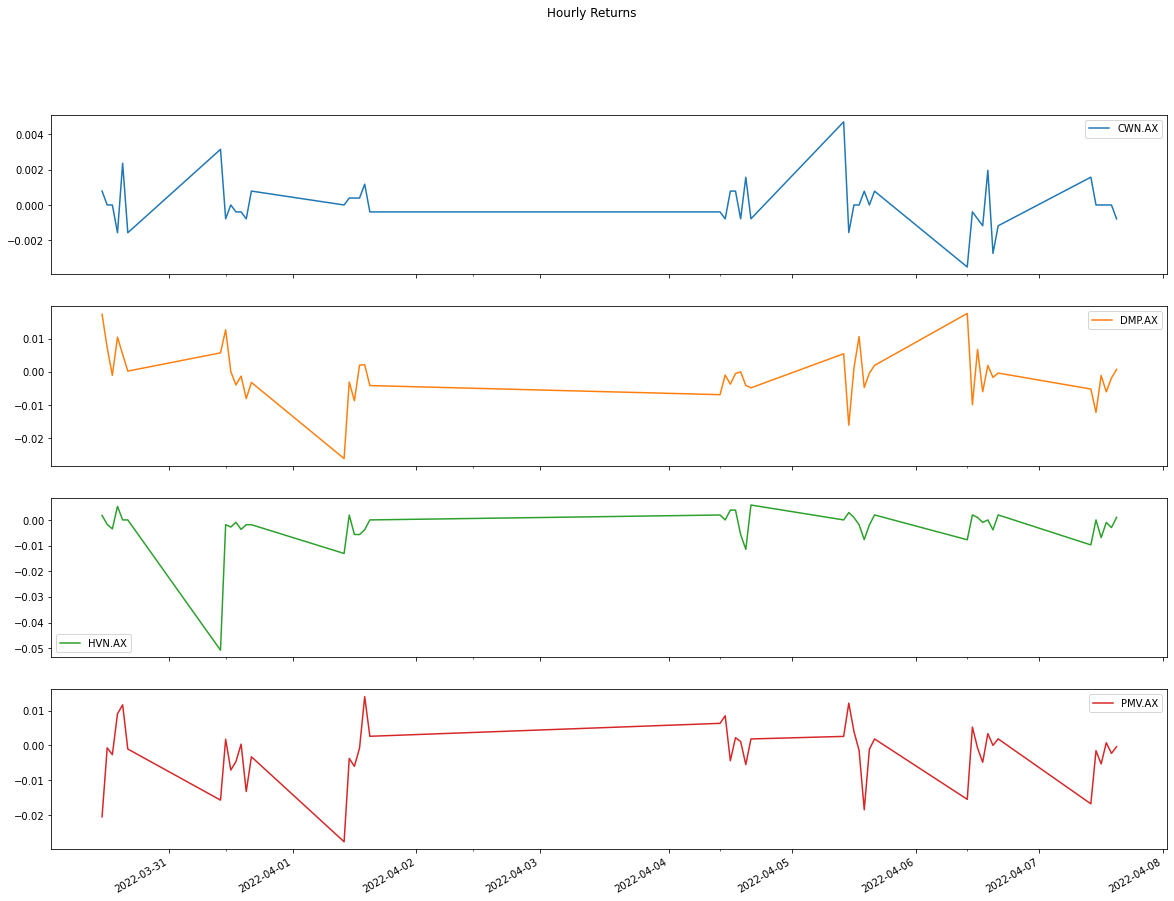

In [72]:
datareturns_df.plot(subplots=True,figsize=(20, 15), title="Hourly Returns")
#graph individually,for loop graphing each column

<AxesSubplot:title={'center':'Cumulative Returns'}>

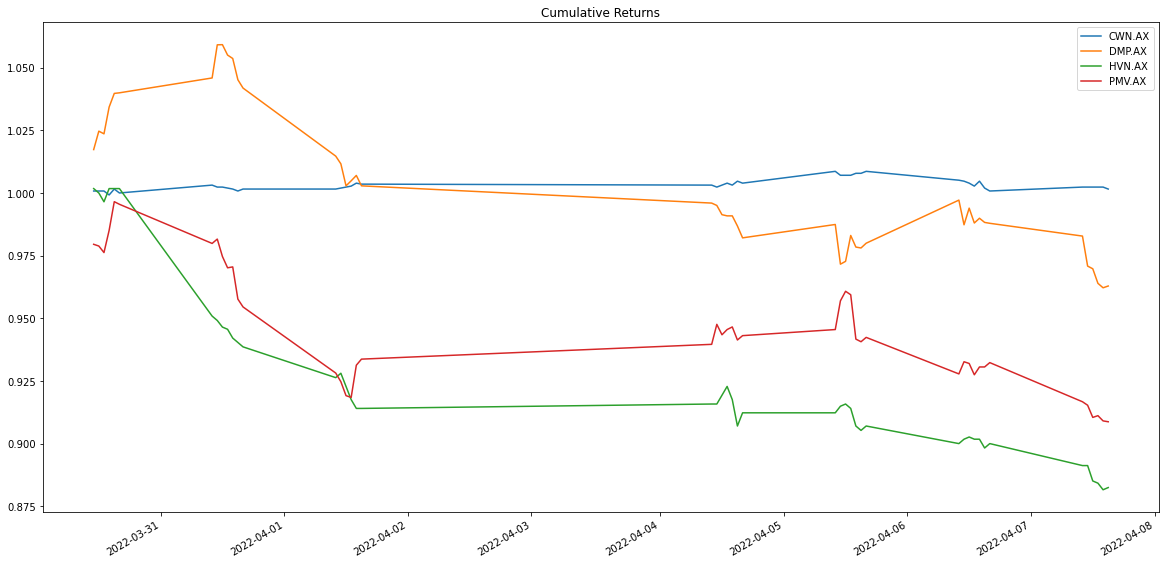

In [73]:
cumulative_returns = (1 + datareturns_df).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(20, 10), title="Cumulative Returns")

In [101]:
cwn = yf.Ticker("CWN.AX")

In [102]:
# show news
cwn.news

[{'uuid': 'be9bfaa8-7aa8-3055-acd4-1e33c9980540',
  'title': 'Wireless Intercom Global Market Report 2022 - ResearchAndMarkets.com',
  'publisher': 'Business Wire',
  'link': 'https://finance.yahoo.com/news/wireless-intercom-global-market-report-115600364.html',
  'providerPublishTime': 1649332560,
  'type': 'STORY'},
 {'uuid': '80f86302-3dcb-3c13-bb4a-54e2ae88ed58',
  'title': "Supervisors and banks worried about 'puzzle' of different Russia sanctions, Spanish central bank says",
  'publisher': 'Reuters',
  'link': 'https://finance.yahoo.com/news/supervisors-banks-worried-puzzle-different-115513002.html',
  'providerPublishTime': 1649332513,
  'type': 'STORY'},
 {'uuid': '22456433-a619-3ef9-b191-03bc54c309b2',
  'title': 'Parks Associates: Amazon Prime Video Penetration Rate is 45% as Streaming Giant Competes to Remain Among Big Three in OTT Video',
  'publisher': 'PR Newswire',
  'link': 'https://finance.yahoo.com/news/parks-associates-amazon-prime-video-115400526.html',
  'providerP

In [94]:
dmp = yf.Ticker("DMP")

In [95]:
dmp.news

[{'uuid': 'edab8827-1e64-33a2-b0f8-783005e49926',
  'title': "At UK£3.83, Is Domino's Pizza Group plc (LON:DOM) Worth Looking At Closely?",
  'publisher': 'Simply Wall St.',
  'link': 'https://finance.yahoo.com/news/uk-3-83-dominos-pizza-091125777.html',
  'providerPublishTime': 1649322685,
  'type': 'STORY'},
 {'uuid': 'e7c3f159-f3f1-3cfc-9871-8678b2f73db4',
  'title': "Domino's Pizza franchise projection falls short of analyst expectations, driving downgrade",
  'publisher': 'MarketWatch',
  'link': 'https://finance.yahoo.com/m/e7c3f159-f3f1-3cfc-9871-8678b2f73db4/domino%27s-pizza-franchise.html',
  'providerPublishTime': 1649182337,
  'type': 'STORY'},
 {'uuid': '17f7b05c-fb42-3f61-88fa-a609b4c52350',
  'title': "Domino's Still Looks Like Cold Pizza",
  'publisher': 'TheStreet.com',
  'link': 'https://finance.yahoo.com/m/17f7b05c-fb42-3f61-88fa-a609b4c52350/domino%27s-still-looks-like.html',
  'providerPublishTime': 1649169420,
  'type': 'STORY'},
 {'uuid': 'de0299e1-b834-311e-8af7-

In [97]:
hvn = yf.Ticker("HVN.AX")
hvn.news

[{'uuid': '6de123b9-ab0f-3afb-a747-8d54614cabed',
  'title': 'Fixing of Coupon Rates\xa0 - Nykredit Realkredit A/S',
  'publisher': 'GlobeNewswire',
  'link': 'https://finance.yahoo.com/news/fixing-coupon-rates-nykredit-realkredit-114900032.html',
  'providerPublishTime': 1649332140,
  'type': 'STORY'},
 {'uuid': '93b87227-d7eb-38a3-b72a-2f8e3b5f48e0',
  'title': 'Alliance Trust PLC - Net Asset Value',
  'publisher': 'GlobeNewswire',
  'link': 'https://finance.yahoo.com/news/alliance-trust-plc-net-asset-114900609.html',
  'providerPublishTime': 1649332140,
  'type': 'STORY'},
 {'uuid': 'e38ab8df-573d-30c7-87dc-1ac0029e39bd',
  'title': 'GoTab Appoints Mike Dunn as Chief Financial Officer',
  'publisher': 'PR Newswire',
  'link': 'https://finance.yahoo.com/news/gotab-appoints-mike-dunn-chief-114900501.html',
  'providerPublishTime': 1649332140,
  'type': 'STORY'},
 {'uuid': 'e86c89de-c42f-3ca4-aa3d-8c14b9fd4ffc',
  'title': 'North America Pet Food Packaging Market (2022 to 2028) - Incre

In [100]:
pmv = yf.Ticker("PMV.AX")
pmv.news

[{'uuid': '6de123b9-ab0f-3afb-a747-8d54614cabed',
  'title': 'Fixing of Coupon Rates\xa0 - Nykredit Realkredit A/S',
  'publisher': 'GlobeNewswire',
  'link': 'https://finance.yahoo.com/news/fixing-coupon-rates-nykredit-realkredit-114900032.html',
  'providerPublishTime': 1649332140,
  'type': 'STORY'},
 {'uuid': '93b87227-d7eb-38a3-b72a-2f8e3b5f48e0',
  'title': 'Alliance Trust PLC - Net Asset Value',
  'publisher': 'GlobeNewswire',
  'link': 'https://finance.yahoo.com/news/alliance-trust-plc-net-asset-114900609.html',
  'providerPublishTime': 1649332140,
  'type': 'STORY'},
 {'uuid': 'e38ab8df-573d-30c7-87dc-1ac0029e39bd',
  'title': 'GoTab Appoints Mike Dunn as Chief Financial Officer',
  'publisher': 'PR Newswire',
  'link': 'https://finance.yahoo.com/news/gotab-appoints-mike-dunn-chief-114900501.html',
  'providerPublishTime': 1649332140,
  'type': 'STORY'},
 {'uuid': 'e86c89de-c42f-3ca4-aa3d-8c14b9fd4ffc',
  'title': 'North America Pet Food Packaging Market (2022 to 2028) - Incre